# Montgomery Police Traffic Stops Analysis with Pandas

## This project explores the Montgomery Police traffic stops and it analyzes gender, race, time of the day and the rate at which subagencies carry out traffic stops.

The dataset contains traffic stopps by montgomery police officers. This dataset is gotten from https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q and it is focused on the state of Maryland.

### Data Preparation

A good analysis requires the data to be thoroughly examined and cleaned.
A clean dataset makes the process easier to work with.
Data preparation involves importing the dataset, handling missing  values, 
place holders, null values and fixing data type to the appropriate columns,
droping less useful columns, 

The dataset is from 01/01/2012 to 12/2/2020.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
# Importing the dataset into a DataFrame and naming it df
df = pd.read_csv(r'C:\Users\Ice Asortse\Desktop\Traffic_Violations.csv')

In [3]:
# Examine the dataset
df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,fbc324ab-bc8d-4743-ba23-7f9f370005e1,8/11/2019,20:02:00,MCP,"2nd District, Bethesda","LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...",CORDELL ST @ NORFOLK AVE.,38.989743,-77.097770,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-1101(a),NaN,NaN,MD,02 - Automobile,2016.0,TOYOTA,CAMRY,SILVER,Citation,21-1101(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9897433333333, -77.09777)"
1,a6d904ec-d666-4bc3-8984-f37a4b31854d,8/12/2019,13:41:00,MCP,"2nd District, Bethesda",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...,NBI270 AT MIDDLEBROOK RD,39.174110,-77.246170,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-801.1,NaN,NaN,MD,02 - Automobile,2016.0,HONDA,CIVIC,GRAY,Citation,21-801.1,Transportation Article,False,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.17411, -77.24617)"
2,54a64f6a-df28-4b65-a335-08883866aa46,8/12/2019,21:00:00,MCP,"5th District, Germantown",DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...,MIDDLEBROOK AN 355,39.182016,-77.238221,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-1129,NaN,NaN,MD,02 - Automobile,2016.0,KIA,SDN,SILVER,Citation,21-1129,Transportation Article,False,BLACK,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1820155, -77.2382213333333)"
3,cf5479b6-9bc7-4216-a7b2-99e57ae932af,8/12/2019,21:43:00,MCP,"5th District, Germantown",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GERMANTOWN RD AND ALE HOUSE,39.160508,-77.284023,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,13-401(h),NaN,NaN,MD,02 - Automobile,2003.0,TOYOTA,SOLARA,BLACK,Citation,13-401(h),Transportation Article,False,BLACK,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1605076666667, -77.284023)"
4,5601ca35-8ee7-4f8e-9208-d89cde96d469,8/12/2019,21:30:00,MCP,"2nd District, Bethesda",FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,EASTWEST/ 355,38.984247,-77.090548,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-201(a1),NaN,NaN,MD,02 - Automobile,2001.0,NISSAN,MAXIMA,SILVER,Citation,16-116(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9842466666667, -77.0905483333333)"


In [4]:
# Renaming Time Of Stop column for beter manipulation
df.rename(columns = {'Time Of Stop': 'Time','Violation Type': 'Violation'}, inplace=True)

In [5]:
# Examining after renaming the Time column
df.head()

,SeqID,Date Of Stop,Time,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,fbc324ab-bc8d-4743-ba23-7f9f370005e1,8/11/2019,20:02:00,MCP,"2nd District, Bethesda","LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...",CORDELL ST @ NORFOLK AVE.,38.989743,-77.097770,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-1101(a),NaN,NaN,MD,02 - Automobile,2016.0,TOYOTA,CAMRY,SILVER,Citation,21-1101(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9897433333333, -77.09777)"
1,a6d904ec-d666-4bc3-8984-f37a4b31854d,8/12/2019,13:41:00,MCP,"2nd District, Bethesda",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...,NBI270 AT MIDDLEBROOK RD,39.174110,-77.246170,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-801.1,NaN,NaN,MD,02 - Automobile,2016.0,HONDA,CIVIC,GRAY,Citation,21-801.1,Transportation Article,False,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.17411, -77.24617)"
2,54a64f6a-df28-4b65-a335-08883866aa46,8/12/2019,21:00:00,MCP,"5th District, Germantown",DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...,MIDDLEBROOK AN 355,39.182016,-77.238221,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-1129,NaN,NaN,MD,02 - Automobile,2016.0,KIA,SDN,SILVER,Citation,21-1129,Transportation Article,False,BLACK,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1820155, -77.2382213333333)"
3,cf5479b6-9bc7-4216-a7b2-99e57ae932af,8/12/2019,21:43:00,MCP,"5th District, Germantown",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GERMANTOWN RD AND ALE HOUSE,39.160508,-77.284023,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,13-401(h),NaN,NaN,MD,02 - Automobile,2003.0,TOYOTA,SOLARA,BLACK,Citation,13-401(h),Transportation Article,False,BLACK,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1605076666667, -77.284023)"
4,5601ca35-8ee7-4f8e-9208-d89cde96d469,8/12/2019,21:30:00,MCP,"2nd District, Bethesda",FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,EASTWEST/ 355,38.984247,-77.090548,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-201(a1),NaN,NaN,MD,02 - Automobile,2001.0,NISSAN,MAXIMA,SILVER,Citation,16-116(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9842466666667, -77.0905483333333)"


In [6]:
# Examine the shape of the DataFrame
df.shape

(1048575, 43)

The Dataset has 1,048,575 rows and 43 columns

In [7]:
# Examing the info the DataFrame
df.info

<bound method DataFrame.info of                                         SeqID Date Of Stop      Time Agency  \
0        fbc324ab-bc8d-4743-ba23-7f9f370005e1    8/11/2019  20:02:00    MCP   
1        a6d904ec-d666-4bc3-8984-f37a4b31854d    8/12/2019  13:41:00    MCP   
2        54a64f6a-df28-4b65-a335-08883866aa46    8/12/2019  21:00:00    MCP   
3        cf5479b6-9bc7-4216-a7b2-99e57ae932af    8/12/2019  21:43:00    MCP   
4        5601ca35-8ee7-4f8e-9208-d89cde96d469    8/12/2019  21:30:00    MCP   
...                                       ...          ...       ...    ...   
1048570  ba2c9138-fb18-4949-8923-840454529d1e   10/15/2018   7:25:00    MCP   
1048571  ba2c9138-fb18-4949-8923-840454529d1e   10/15/2018   7:25:00    MCP   
1048572  69710f76-91e2-4ac7-9256-0f8a7588820f   10/15/2018   7:48:00    MCP   
1048573  69710f76-91e2-4ac7-9256-0f8a7588820f   10/15/2018   7:48:00    MCP   
1048574  fd371547-6c8c-42b1-acba-4b92ed2093ee   10/22/2018   9:34:00    MCP   

                   

In [8]:
df.head()

,SeqID,Date Of Stop,Time,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,fbc324ab-bc8d-4743-ba23-7f9f370005e1,8/11/2019,20:02:00,MCP,"2nd District, Bethesda","LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...",CORDELL ST @ NORFOLK AVE.,38.989743,-77.097770,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-1101(a),NaN,NaN,MD,02 - Automobile,2016.0,TOYOTA,CAMRY,SILVER,Citation,21-1101(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9897433333333, -77.09777)"
1,a6d904ec-d666-4bc3-8984-f37a4b31854d,8/12/2019,13:41:00,MCP,"2nd District, Bethesda",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...,NBI270 AT MIDDLEBROOK RD,39.174110,-77.246170,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-801.1,NaN,NaN,MD,02 - Automobile,2016.0,HONDA,CIVIC,GRAY,Citation,21-801.1,Transportation Article,False,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.17411, -77.24617)"
2,54a64f6a-df28-4b65-a335-08883866aa46,8/12/2019,21:00:00,MCP,"5th District, Germantown",DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...,MIDDLEBROOK AN 355,39.182016,-77.238221,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-1129,NaN,NaN,MD,02 - Automobile,2016.0,KIA,SDN,SILVER,Citation,21-1129,Transportation Article,False,BLACK,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1820155, -77.2382213333333)"
3,cf5479b6-9bc7-4216-a7b2-99e57ae932af,8/12/2019,21:43:00,MCP,"5th District, Germantown",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GERMANTOWN RD AND ALE HOUSE,39.160508,-77.284023,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,13-401(h),NaN,NaN,MD,02 - Automobile,2003.0,TOYOTA,SOLARA,BLACK,Citation,13-401(h),Transportation Article,False,BLACK,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1605076666667, -77.284023)"
4,5601ca35-8ee7-4f8e-9208-d89cde96d469,8/12/2019,21:30:00,MCP,"2nd District, Bethesda",FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,EASTWEST/ 355,38.984247,-77.090548,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-201(a1),NaN,NaN,MD,02 - Automobile,2001.0,NISSAN,MAXIMA,SILVER,Citation,16-116(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9842466666667, -77.0905483333333)"


In [9]:
# Examine the missing values
df.isna().any()

SeqID                      False
Date Of Stop               False
Time                       False
Agency                     False
SubAgency                  False
Description                 True
Location                    True
Latitude                   False
Longitude                  False
Accident                   False
Belts                      False
Personal Injury            False
Property Damage            False
Fatal                      False
Commercial License         False
HAZMAT                     False
Commercial Vehicle         False
Alcohol                    False
Work Zone                  False
Search Conducted            True
Search Disposition          True
Search Outcome              True
Search Reason               True
Search Reason For Stop      True
Search Type                 True
Search Arrest Reason        True
State                       True
VehicleType                False
Year                        True
Make                        True
Model     

In [10]:
# Checking to amount of missing value
df.isna().sum()

SeqID                            0
Date Of Stop                     0
Time                             0
Agency                           0
SubAgency                        0
Description                      7
Location                         1
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work Zone                        0
Search Conducted            609497
Search Disposition          991293
Search Outcome              628482
Search Reason               991293
Search Reason For Stop      609649
Search Type                 991300
Search Arrest Reason       1006044
State                           56
VehicleType                      0
Year                

Looks like we have a lot of missing values in some of the columns

In [26]:
# Checking for duplicates
duplicates = df[df.duplicated()]


In [27]:
print(len(duplicates))

1593


We have 1,593 duplicates

In [28]:
# Dropping the duplicates
df.drop_duplicates(keep='first',inplace=True) 

In [29]:
# Cross Checking the amount of duplicates
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [30]:
# Check for percentage of value counts for entries
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n\n')

SeqID 
 33c49de3-9e36-4f36-9326-b59a95e86fe8    0.000056
28c5bfc1-5670-4751-be16-e1d83cda20f0    0.000040
c474e98e-128c-40e0-a487-d988cc67f0bd    0.000037
859768f4-bde0-427b-a60f-07b1e2aaadc4    0.000037
42ee969e-cc65-4557-bc1a-cefa6b35cba8    0.000036
8fe624e5-2bef-4cf9-963b-58fbb1e206c2    0.000035
d8c32585-3c35-4862-987b-aa65d36a53db    0.000033
1f0803c8-b026-4f42-a04b-a3c43404e26f    0.000032
5b92200b-57e1-4483-9e03-81af3fb39492    0.000032
e1fdbb16-88b3-409f-934d-a8ca6cc3f2b1    0.000032
Name: SeqID, dtype: float64 


Date Of Stop 
 3/5/2019     0.001132
7/8/2014     0.000831
5/22/2012    0.000831
5/10/2012    0.000802
5/6/2014     0.000763
7/7/2014     0.000761
5/20/2014    0.000754
1/25/2017    0.000745
3/24/2014    0.000740
5/16/2012    0.000739
Name: Date Of Stop, dtype: float64 


Time 
 23:30:00    0.001382
23:20:00    0.001281
23:00:00    0.001276
22:53:00    0.001267
22:50:00    0.001245
23:15:00    0.001238
23:12:00    0.001216
22:35:00    0.001194
23:35:00    0.001193
22

Article 
 Transportation Article    0.987335
Maryland Rules            0.012622
BR                        0.000021
TG                        0.000018
1A                        0.000004
Name: Article, dtype: float64 


Contributed To Accident 
 False    0.963103
True     0.036897
Name: Contributed To Accident, dtype: float64 


Race 
 WHITE              0.355231
BLACK              0.312978
HISPANIC           0.225017
ASIAN              0.053508
OTHER              0.051445
NATIVE AMERICAN    0.001821
Name: Race, dtype: float64 


Gender 
 M    0.683735
F    0.314613
U    0.001652
Name: Gender, dtype: float64 


Driver City 
 SILVER SPRING         0.242071
GAITHERSBURG          0.104090
GERMANTOWN            0.084384
ROCKVILLE             0.078248
WASHINGTON            0.030466
BETHESDA              0.026692
MONTGOMERY VILLAGE    0.026244
HYATTSVILLE           0.024851
POTOMAC               0.020262
OLNEY                 0.016932
Name: Driver City, dtype: float64 


Driver State 
 MD    0

In [31]:
# Replace place holders with nan
df.replace(['?',], np.nan, inplace=True)

In [32]:
#make list of var containing missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>1]

#print var name and % of missing values
for var in vars_with_na:
    print(var, np.round(df[var].isnull().mean(),3), '% missing values')

Description 0.0 % missing values
Search Conducted 0.581 % missing values
Search Disposition 0.946 % missing values
Search Outcome 0.6 % missing values
Search Reason 0.946 % missing values
Search Reason For Stop 0.582 % missing values
Search Type 0.946 % missing values
Search Arrest Reason 0.96 % missing values
State 0.0 % missing values
Year 0.006 % missing values
Make 0.0 % missing values
Model 0.0 % missing values
Color 0.013 % missing values
Article 0.021 % missing values
Driver City 0.0 % missing values
Driver State 0.0 % missing values
DL State 0.001 % missing values


In [33]:
# drop columns that are not useful for the project analysis
drop_column = ['SeqID','Agency','Description','Location','Latitude','Longitude','Accident', 
               'Belts','Personal Injury', 'Property Damage','Fatal','Commercial License',
               'HAZMAT','Commercial Vehicle','Alcohol','Work Zone','Search Conducted',
               'Search Disposition','Search Outcome','Search Reason','Search Reason For Stop',
               'Search Type','Search Arrest Reason','VehicleType','Model','Color','Charge','Article',
               'Contributed To Accident','Arrest Type','Geolocation']
df.drop(drop_column, axis=1, inplace=True)

In [36]:
# Drop missing values
data = df.dropna()

In [35]:
# Examine data shape
data.shape

(1039614, 12)

In [37]:
# examing if there is any missing values left
data.isna().sum()

Date Of Stop    0
Time            0
SubAgency       0
State           0
Year            0
Make            0
Violation       0
Race            0
Gender          0
Driver City     0
Driver State    0
DL State        0
dtype: int64

In [38]:
#examine if there is any null values left
data.isnull().sum()

Date Of Stop    0
Time            0
SubAgency       0
State           0
Year            0
Make            0
Violation       0
Race            0
Gender          0
Driver City     0
Driver State    0
DL State        0
dtype: int64

In [39]:
# Examine the shape of the clean dataset
data.shape

(1039614, 12)

The clean dataset has 1,039,614 rows and 12 columns

In [40]:
# converting 'Year Of  Stop' to datatime 
data['Year Of Stop'] = pd.DatetimeIndex(data['Date Of Stop']).year
data.head()

,Date Of Stop,Time,SubAgency,State,Year,Make,Violation,Race,Gender,Driver City,Driver State,DL State,Year Of Stop
0,8/11/2019,20:02:00,"2nd District, Bethesda",MD,2016.0,TOYOTA,Citation,BLACK,M,SILVER SPRING,MD,MD,2019
1,8/12/2019,13:41:00,"2nd District, Bethesda",MD,2016.0,HONDA,Citation,WHITE,M,SILVER SPRING,MD,MD,2019
2,8/12/2019,21:00:00,"5th District, Germantown",MD,2016.0,KIA,Citation,BLACK,M,GAITHERSBURG,MD,MD,2019
3,8/12/2019,21:43:00,"5th District, Germantown",MD,2003.0,TOYOTA,Citation,BLACK,M,GERMANTOWN,MD,MD,2019
4,8/12/2019,21:30:00,"2nd District, Bethesda",MD,2001.0,NISSAN,Citation,BLACK,M,SILVER SPRING,MD,MD,2019


In [42]:
# Examine the top 15 states with most stops
pd.DataFrame(data['State'].value_counts()/len(data)).nlargest(15, columns = ['State'])

,State
MD,0.873714
VA,0.046304
DC,0.024524
PA,0.007473
TX,0.004982
FL,0.004617
WV,0.004617
NC,0.003879
NY,0.003157
NJ,0.002821


Looks like cars from Maryland make up 87.4% of the stops in montgomery county

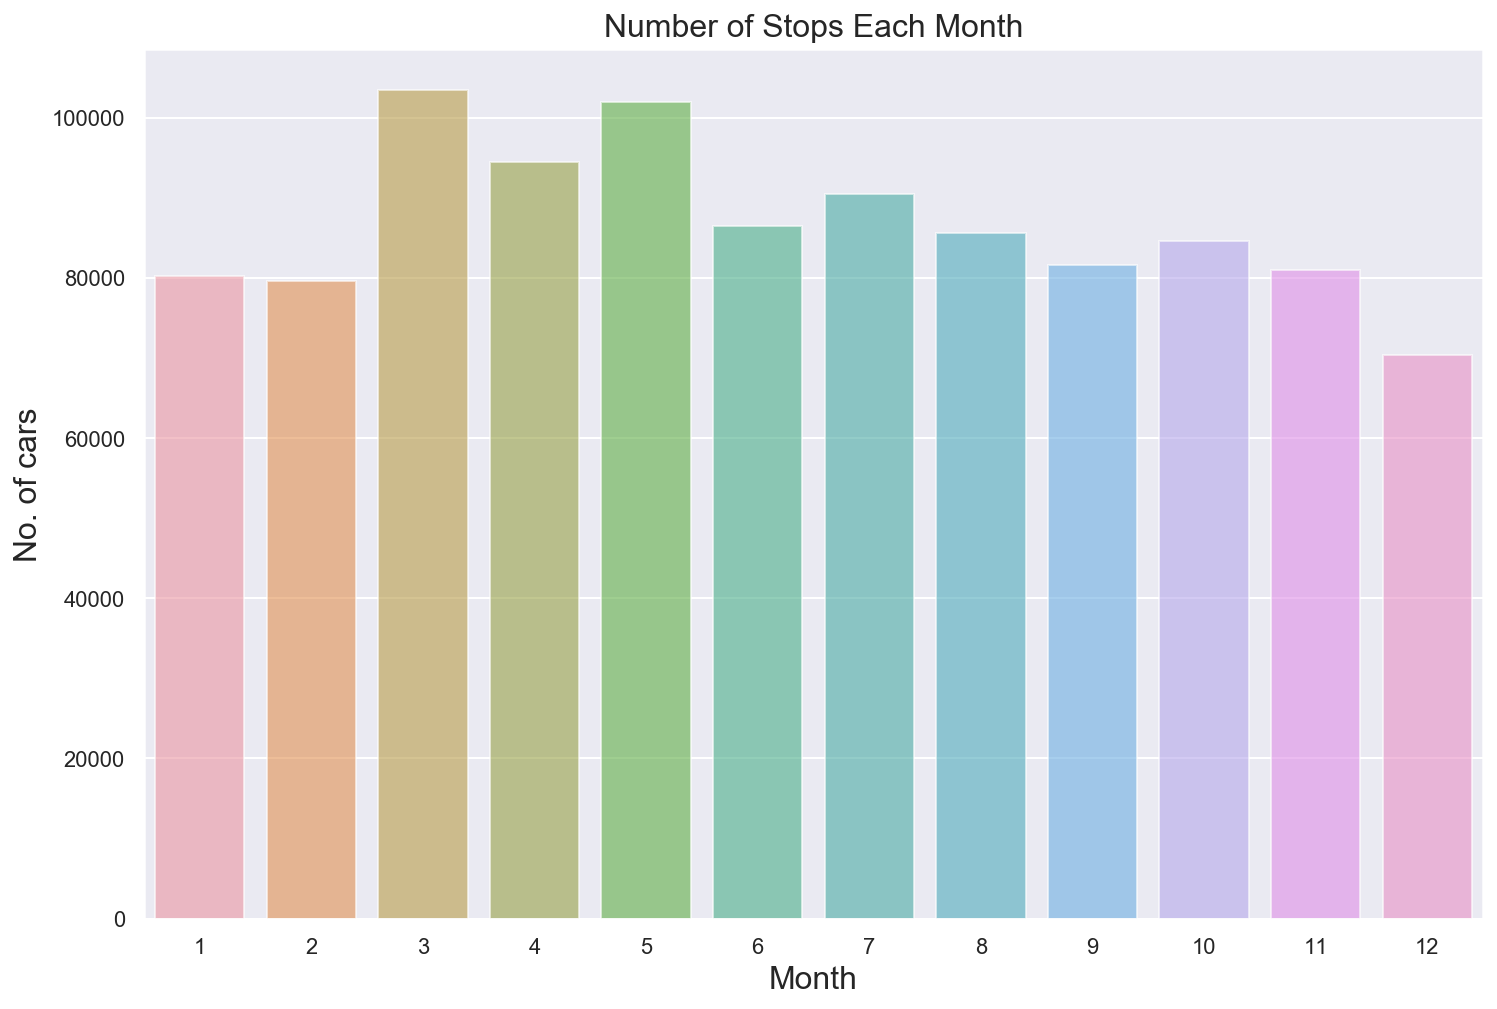

In [43]:
# Visualize Stops by the months
month = []
for time_stamp in pd.to_datetime(data['Date Of Stop']):
    month.append(time_stamp.month)
m_count = pd.Series(month).value_counts()

plt.figure(figsize=(12,8))
sns.barplot(y=m_count.values, x=m_count.index, alpha=0.6)
plt.title("Number of Stops Each Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show();

From our visualization, March has the highest stops followed closely by May then April

In [45]:
# examine the year model of the vehicles stopped
pd.DataFrame(data['Year'].value_counts()).nlargest(10, columns = ['Year'])

,Year
2006.0,62338
2007.0,61941
2005.0,60939
2004.0,59737
2003.0,56592
2008.0,55751
2012.0,55601
2013.0,52385
2011.0,52221
2002.0,51660


the 2006 cars are the most stopped followed closely by 2007 then 2005

In [46]:
# examine the number of stops based on Race
pd.DataFrame(data['Race'].value_counts()).nlargest(10, columns = ['Race'])

,Race
WHITE,370019
BLACK,324879
HISPANIC,233716
ASIAN,55756
OTHER,53354
NATIVE AMERICAN,1890


In [47]:
# Examine the number of stops based on Gender
pd.DataFrame(data['Gender'].value_counts()).nlargest(10, columns = ['Gender'])

,Gender
M,710771
F,327357
U,1486


The male gender is most stopped

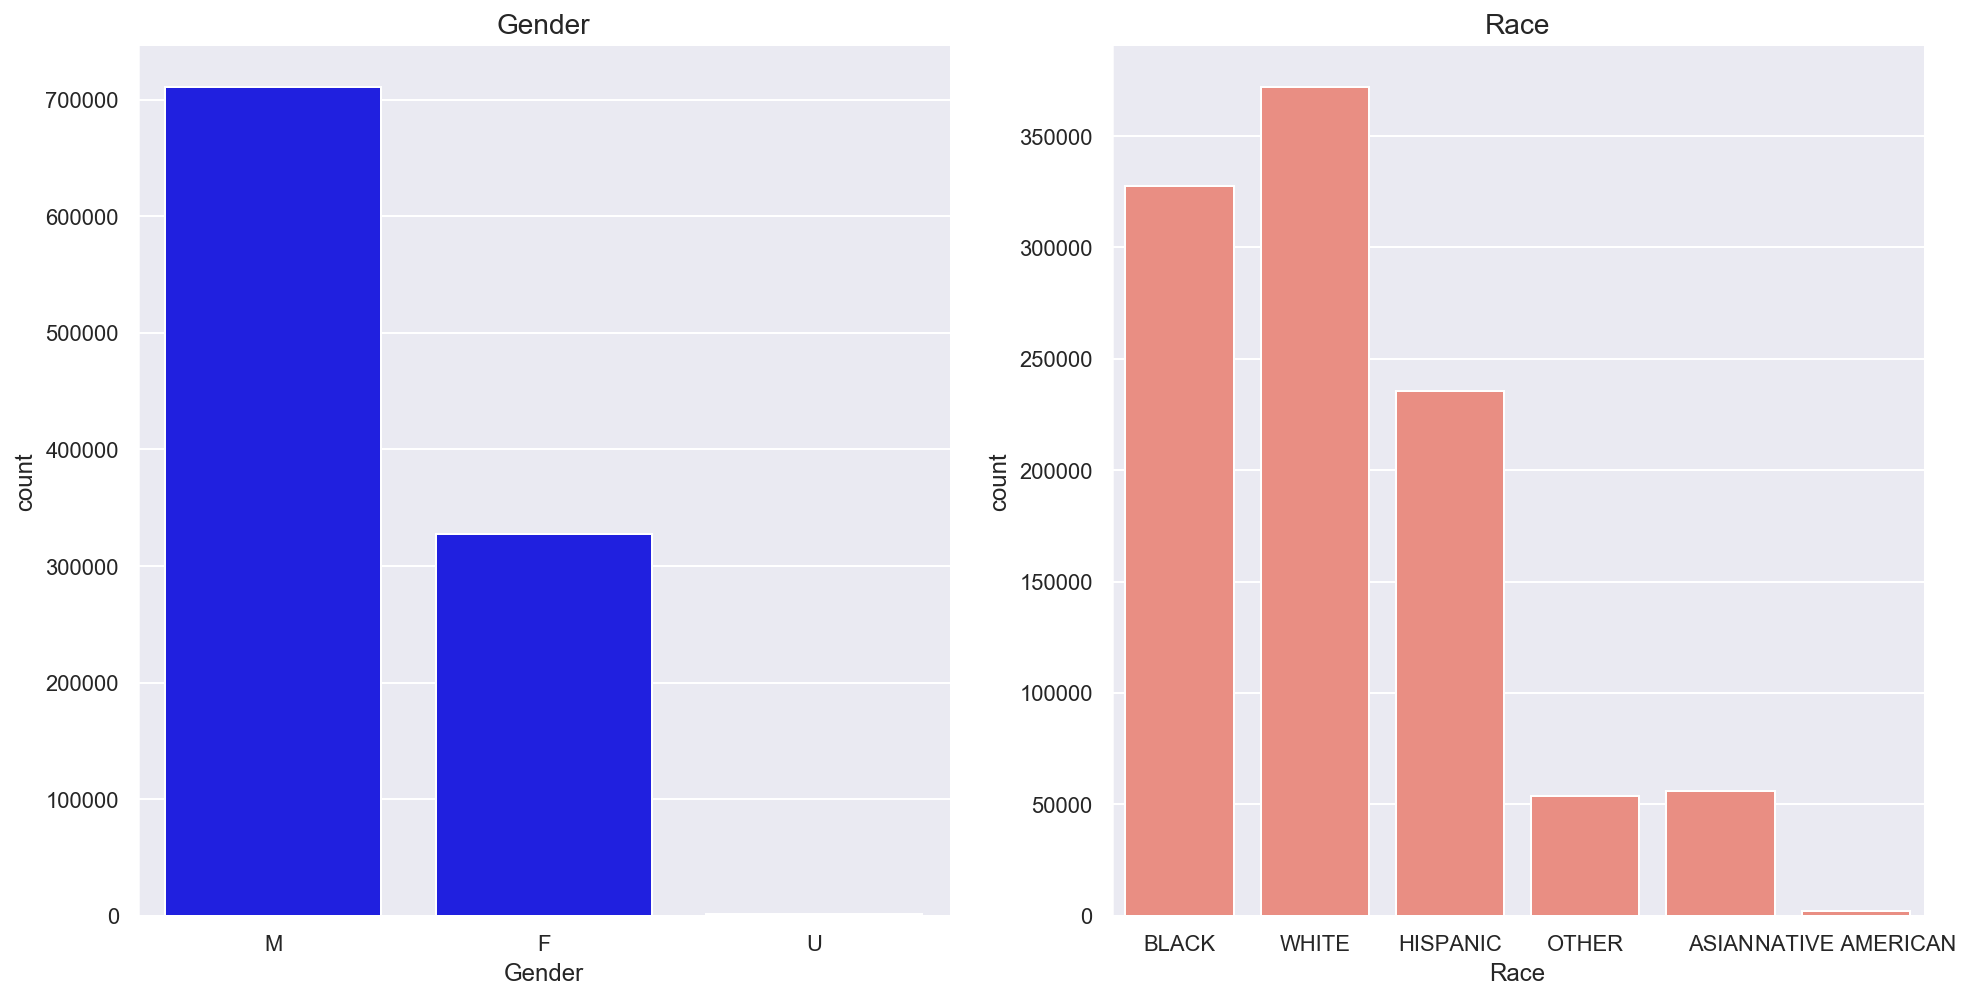

In [48]:
# Visuals for the Race and Gender disparity
fig, ax = plt.subplots(1, 2, figsize=(16,8))

fig.subplots_adjust(hspace=0.5)

sns.countplot(data['Gender'], ax=ax[0], color='blue')
ax[0].set_title("Gender", fontsize=14)

sns.countplot(df['Race'], ax=ax[1], color='salmon')
ax[1].set_title("Race", fontsize=14)

sns.despine()


In [51]:
# Examine the city with the most stopped drivers
violation_county = pd.DataFrame(data['Driver City'].
 value_counts()/len(data)).nlargest(10, columns = ['Driver City'])

violation_county

,Driver City
SILVER SPRING,0.241503
GAITHERSBURG,0.104176
GERMANTOWN,0.084443
ROCKVILLE,0.078319
WASHINGTON,0.030220
BETHESDA,0.026659
MONTGOMERY VILLAGE,0.026251
HYATTSVILLE,0.024796
POTOMAC,0.020347
OLNEY,0.016997


In [ ]:
data.head()

In [ ]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = data['Date Of Stop'].str.cat(data['Time'], sep = ' ')

# Convert 'combined' to datetime format
data['stop_datetime'] = pd.to_datetime(combined)

# Examine the data type of 'stop_datetime'
print(data.stop_datetime.dtype)

In [ ]:
data.head()


In [ ]:
data.set_index('stop_datetime', inplace=True)

In [ ]:
data.head()

In [ ]:
print(data.index)

In [ ]:
time_of_stops = data.groupby(data.index.hour).Time.count()

In [ ]:
# Create a line plot of 'hourly_arrest_rate'
time_of_stops.plot(kind='bar', figsize=(16,8))

# Add the xlabel, ylabel, and title
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Number of Stops', fontsize=16)
plt.title('Stops By the Hour', fontsize =20)

# Display the plot
plt.show()

In [ ]:
# Count the unique values in 'violation'
violations = pd.DataFrame(data.Violation.value_counts())


# Express the counts as proportions
violation_perct = pd.DataFrame(data.Violation.value_counts(normalize = True))

In [ ]:
print(violations)

print('----------------------')

print(violation_perct)

In [ ]:
violations.plot(kind='bar', color='green')

In [ ]:
precints = pd.DataFrame(data.SubAgency.value_counts())
precints

In [ ]:
precints_perct = pd.DataFrame(data.SubAgency.value_counts(normalize = True))
precints_perct

In [ ]:
precints.plot(kind='bar', color='tan')